In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle 

In [129]:
with open('./data/test.pkl', 'rb') as fd:
    unpickledTest = pickle.load(fd)

with open('./data/train.pkl', 'rb') as fd:
    unpickledTrain = pickle.load(fd)

In [130]:
#partition Data
testData = unpickledTest

np.random.shuffle(unpickledTrain)
trainData = np.split(unpickledTrain, 10)


In [131]:
maxDegree = 20
numModels = 10

bias2Arr = np.zeros(maxDegree)
varianceArr = np.zeros(maxDegree)

for deg in range(maxDegree): 
    predMatrix = np.zeros((numModels,len(testData[:, 0])))
    for i in range(numModels): #should be 0, 10
        poly = PolynomialFeatures(degree = deg)
        # reshaping data
        X_train = poly.fit_transform(trainData[i][:, 0].reshape(-1, 1))
        y_train = trainData[i][:, 1].reshape(-1, 1)
        X_test = poly.fit_transform(testData[:, 0].reshape(-1, 1))
        y_test = testData[:, 1].reshape(-1, 1)

        reg = LinearRegression()
        reg.fit(X_train, y_train)
        
        y_pred = reg.predict(X_test)
        # print(y_pred.reshape(len(y_pred)).shape)
        predMatrix[i] = y_pred.reshape( len(y_pred))
        # print(y_pred)
    bias2Arr[deg] = np.mean((np.mean(predMatrix, axis =0) - testData[:, 1]) ** 2)
    varianceArr[deg] = np.mean(np.var(predMatrix, axis = 0))

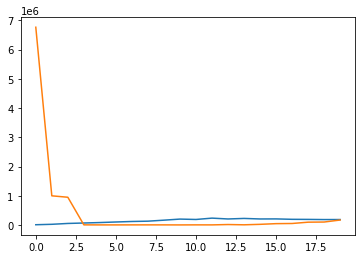

In [132]:
plt.plot(varianceArr)
plt.plot(bias2Arr)
plt.show()

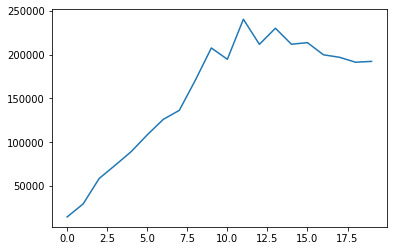

In [133]:
plt.plot(varianceArr)
plt.show()